<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

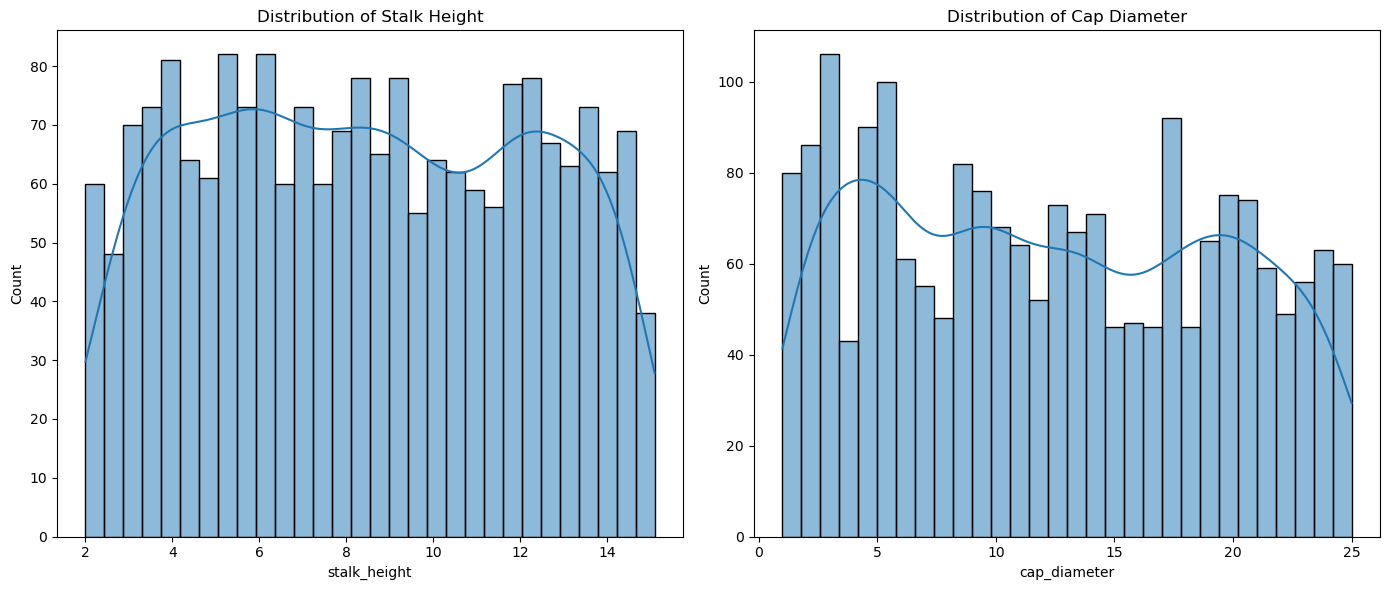

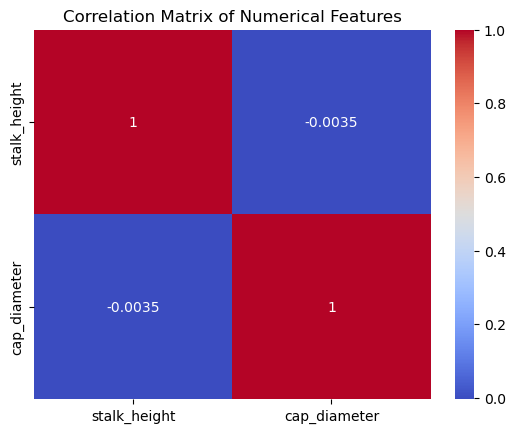

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


mushroom_df = pd.read_csv('mushroom.csv')
print(mushroom_df.info())
print(mushroom_df.head())

# 2. Utilize histograms, box plots, or density plots to understand feature distributions
# Example for numerical features
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(mushroom_df['stalk_height'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Stalk Height')
sns.histplot(mushroom_df['cap_diameter'], bins=30, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Cap Diameter')
plt.tight_layout()
plt.show()

# 3. Investigate feature correlations to discern relationships within the data
# Correlation matrix for numerical features
correlation_matrix = mushroom_df[['stalk_height', 'cap_diameter']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()




# Task 2: Data Preprocessing

In [21]:


# 1.categorical variables
categorical_features = mushroom_df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(mushroom_df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Combine the encoded features
numerical_features = mushroom_df.select_dtypes(include=['float64']).columns
final_df = pd.concat([encoded_df, mushroom_df[numerical_features]], axis=1)

#  target variable
y = mushroom_df['class']
X = final_df

# 2. Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Data Visualization

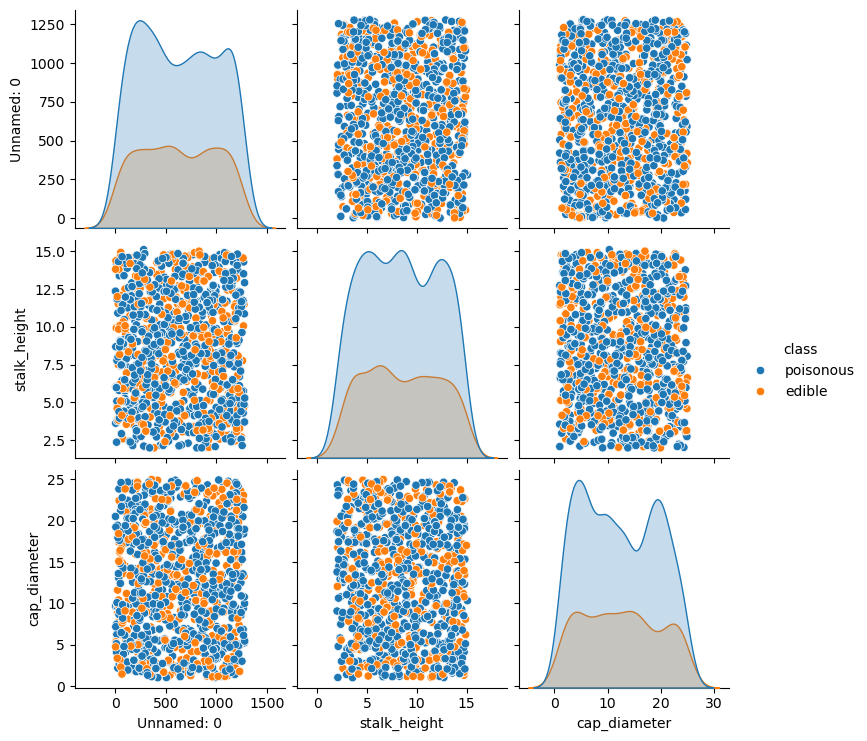

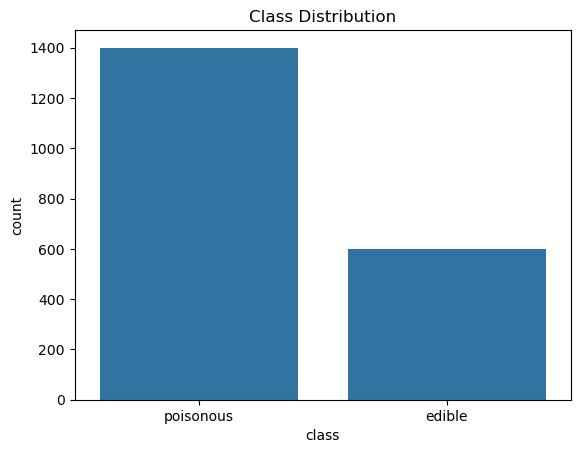

In [22]:

# 1. Employ scatter plots, pair plots, or relevant visualizations
sns.pairplot(mushroom_df, hue='class')
plt.show()

# 2. Visualize class distributions to gauge dataset balance
sns.countplot(data=mushroom_df, x='class')
plt.title('Class Distribution')
plt.show()


# Task 4: SVM Implementation


In [23]:

# 1. Implement a basic SVM classifier using Python libraries like scikit-learn
svm = SVC()

# 2. Train the SVM model on the training data
svm.fit(X_train, y_train)

# 3. Evaluate model performance on the testing data using appropriate metrics
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='poisonous')
recall = recall_score(y_test, y_pred, pos_label='poisonous')
f1 = f1_score(y_test, y_pred, pos_label='poisonous')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Task 5: Visualization of SVM Results


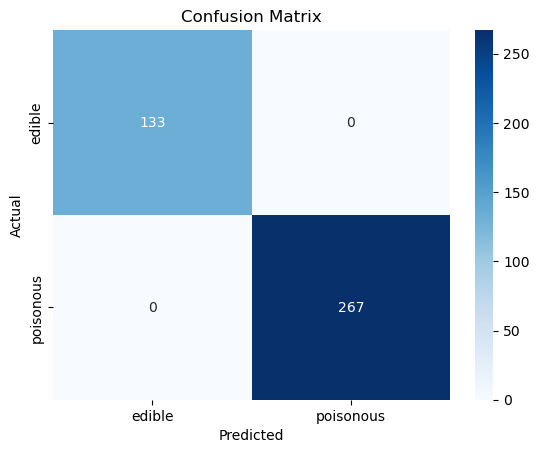

In [24]:


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['edible', 'poisonous'], yticklabels=['edible', 'poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Task 6: Parameter Tuning and Optimization

In [25]:


# 1. Experiment with different SVM hyperparameters to optimize performance
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

#  parameters found by GridSearchCV
print(f'Best Parameters: {grid.best_params_}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=

# Task 7: Comparison and Analysis


In [26]:


# 1. Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='poisonous')
    recall = recall_score(y_test, y_pred, pos_label='poisonous')
    f1 = f1_score(y_test, y_pred, pos_label='poisonous')
    print(f'Kernel: {kernel}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('-' * 30)

Kernel: linear
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
------------------------------
Kernel: poly
Accuracy: 0.885
Precision: 0.853035143769968
Recall: 1.0
F1 Score: 0.9206896551724137
------------------------------
Kernel: rbf
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
------------------------------
Kernel: sigmoid
Accuracy: 0.6575
Precision: 0.7241379310344828
Recall: 0.7865168539325843
F1 Score: 0.7540394973070018
------------------------------
